<strong>avant de commencer , on a fait une concaténation de deux classes 'tr_fraudes' et 'tr_normales' , le résultat de la concaténation était 'cleaned_data.csv' , ce dataset commence avec toutes les transactions normales (étiquetées avec 0) jusqu'au milieu, suivi de toutes les transactions frauduleuses (étiquetées avec 1) à partir du milieu jusqu'à la fin .
</strong>
<strong>
dans ce cas ,  on doit élanger les données de manière aléatoire avant de diviser en ensembles d'entraînement et de test. </strong>
<strong>
Cela garantit que les ensembles de données contiennent un mélange représentatif des deux classes et évite que le modèle ne se base uniquement sur l'ordre des transactions pour prendre des décisions.
</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Dataframe
dataset =pd.read_csv('cleaned_data.csv')


In [3]:
# d'abord nous voulons mélanger le dataset en fonction de la colonne 'isFraud' utilisant sort_values()
# La méthode sort_values() est une fonctionnalité existe sur Pandas.
# Elle est utilisée pour trier un DataFrame ou une série en fonction des valeurs d'une ou plusieurs colonnes.

In [4]:
data_melang = dataset.sort_values(by='isFraud').sample(frac=1, random_state=5)

In [5]:
#faire une copie 
data = data_melang.copy()

In [6]:
data.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFraud,isFlaggedFraud
9381,1,11272.74,52250.00,1,0.00,0,0
12196,5,226193.35,1331498.39,0,548993.70,0,0
2799,2,4720554.95,4720554.95,0,0.00,1,0
6094,3,1688761.08,1688761.08,0,0.00,1,0
13118,5,455427.69,14409380.62,0,8565657.72,0,0


In [7]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'nameDest', 'oldbalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [8]:
# features
x = data.drop('isFraud',axis=1)

# target
y = data['isFraud']

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [10]:
# les Colonnes à normaliser
cols_a_normaliser = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

# Initialiser le MinMaxScaler et fit_transform seulement les colonnes selectionnées 
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(x[cols_a_normaliser])
x[cols_a_normaliser] = X_minmax

# Normalisation min_max :
__________________________________________________________


<img src='imgs/minmax.PNG' style ='width:300px;heigth:800px' >  

__________________________________________________________


In [11]:
x.head()

,type,amount,oldbalanceOrg,nameDest,oldbalanceDest,isFlaggedFraud
9381,1,0.000428,0.000877,1,0.000000,0
12196,5,0.008579,0.022346,0,0.002324,0
2799,2,0.179050,0.079224,0,0.000000,0
6094,3,0.064055,0.028342,0,0.000000,0
13118,5,0.017274,0.241829,0,0.036260,0


# l'Apprentissage Automatique :

Model: SVM
Accuracy: 0.78
F1-Score: 0.77
Precision: 0.85
Confusion Matrix:
[[ 917  730]
 [   0 1639]]


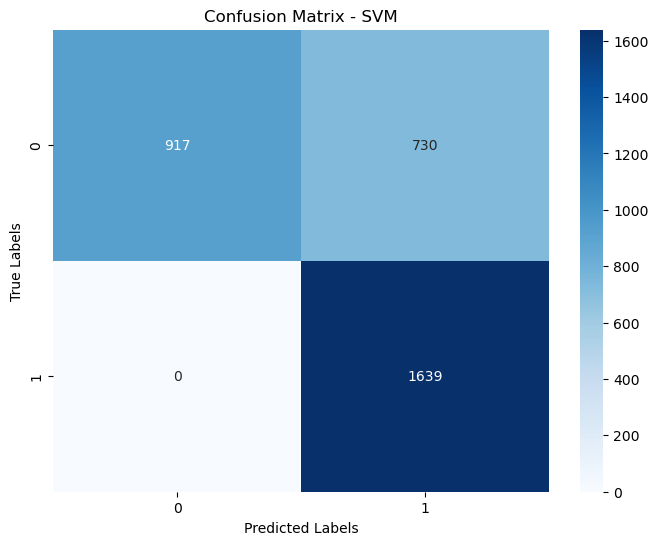

Model: Decision Tree
Accuracy: 0.98
F1-Score: 0.98
Precision: 0.98
Confusion Matrix:
[[1612   35]
 [  20 1619]]


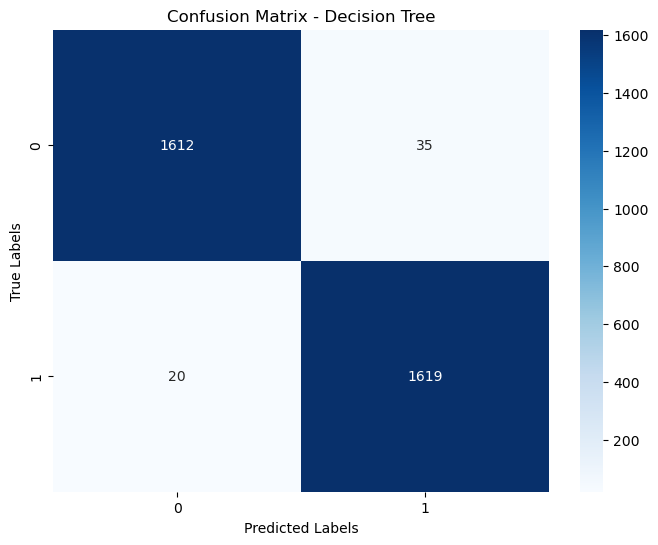

Model: Random Forest
Accuracy: 0.99
F1-Score: 0.99
Precision: 0.99
Confusion Matrix:
[[1607   40]
 [   5 1634]]


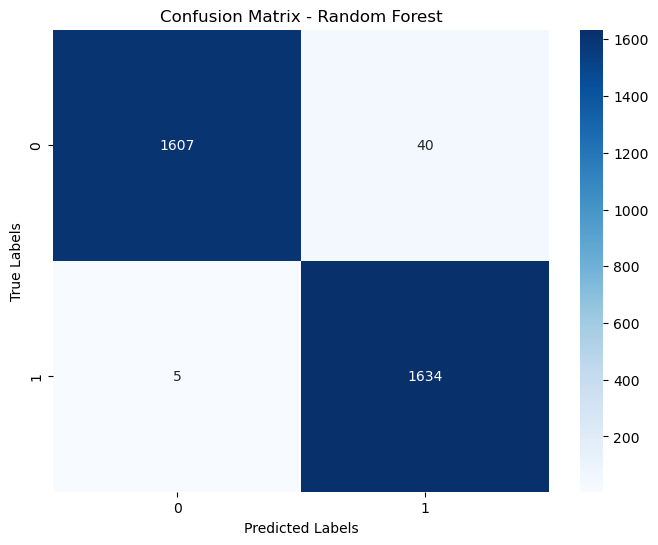

Model: KNN
Accuracy: 0.97
F1-Score: 0.97
Precision: 0.97
Confusion Matrix:
[[1583   64]
 [  22 1617]]


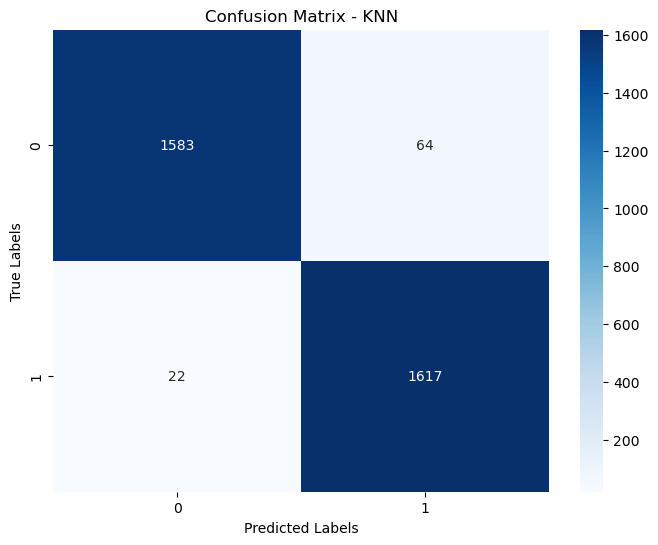

Model: Logistic Regression
Accuracy: 0.82
F1-Score: 0.82
Precision: 0.82
Confusion Matrix:
[[1352  295]
 [ 289 1350]]


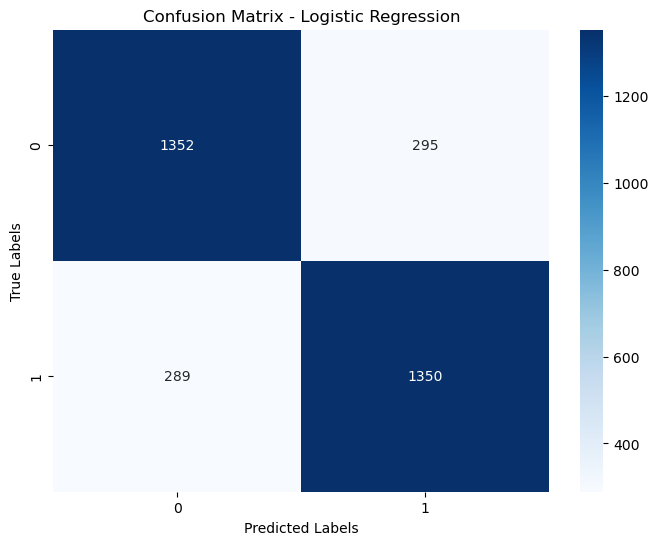

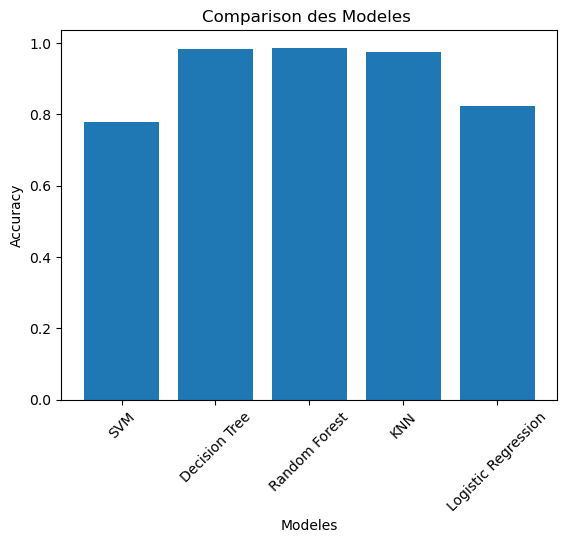

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns


# divisier (Split)  nos données en (train) et (test) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List des modeles utilisé
models = [
    ('SVM', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

results = []

# l'entrainnement et  l'evaluation de chaque modele
for name, model in models:
    #entrainnement 
    model.fit(x_train, y_train)
    #prédiction(test)
    y_pred = model.predict(x_test)
    
    # Calculons les  metriques
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    
    # calcoler la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Sauvegarder les resultats
    results.append((name, accuracy, f1, precision, conf_matrix))

# afficher les  resultats
for name, accuracy, f1, precision, conf_matrix in results:
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # afficher la matrice de confusion utilisant Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    print("==============================")

# Create a bar chart comparing accuracy
names = [name for name, _, _, _, _ in results]
accuracies = [accuracy for _, accuracy, _, _, _ in results]

plt.bar(names, accuracies)
plt.xlabel('Modeles')
plt.ylabel('Accuracy')
plt.title('Comparison des Modeles ')
plt.xticks(rotation=45)
plt.show()
